Merging Datasets

The merge() function combines datasets based on common columns or indices, similar to SQL joins.

In [1]:
import pandas as pd

# Create two datasets
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Perform an inner merge
merged = pd.merge(df1, df2, on='ID', how='inner')
print("Merged Dataset:\n", merged)


Merged Dataset:
    ID     Name  Score
0   2      Bob     85
1   3  Charlie     90


Concatenating Datasets

The concat() function stacks datasets vertically (row-wise) or horizontally (column-wise).

In [2]:
# Concatenate row-wise
df3 = pd.DataFrame({'ID': [5, 6], 'Name': ['David', 'Eva']})
concatenated = pd.concat([df1, df3], axis=0)
print("Concatenated Dataset:\n", concatenated)


Concatenated Dataset:
    ID     Name
0   1    Alice
1   2      Bob
2   3  Charlie
0   5    David
1   6      Eva


Reshaping with Pivot Tables

pivot_table() reshapes data by aggregating values.


In [3]:
sales_data = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [100, 200, 150, 250]
})

# Create a pivot table to aggregate sales by date and product
pivot = sales_data.pivot_table(values='Sales', index='Date', columns='Product', aggfunc='sum')
print("Pivot Table:\n", pivot)


Pivot Table:
 Product       A    B
Date                
2023-01-01  100  200
2023-01-02  150  250


Time-Series Handling

Convert date columns to datetime objects for easier manipulation.

Perform operations like resampling or extracting specific time units.

In [4]:
# Convert to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract year and month
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
print("Time-Series Data:\n", sales_data)


Time-Series Data:
         Date Product  Sales  Year  Month
0 2023-01-01       A    100  2023      1
1 2023-01-01       B    200  2023      1
2 2023-01-02       A    150  2023      1
3 2023-01-02       B    250  2023      1


Group-by Operations

Group data by one or more columns and apply aggregations.

In [5]:
# Group by product and calculate total sales
grouped = sales_data.groupby('Product')['Sales'].sum()
print("Total Sales by Product:\n", grouped)


Total Sales by Product:
 Product
A    250
B    450
Name: Sales, dtype: int64



# Real-World Dataset Practice

Dataset: Time-Series Sales Trends

Objective: Analyze sales trends for products over time.

Steps:


1. Load a time-series dataset (or create one).

2. Clean and preprocess the data.

3. Group by date and product to analyze trends.

4. Resample or aggregate data for monthly trends.

5. Visualize the results.

Quarterly Sales:
             Sales
Date             
2023-03-31    450
2023-06-30    900
2023-09-30   1350
2023-12-31   1800


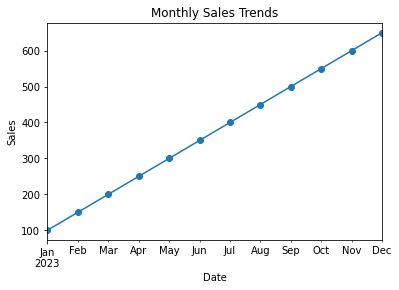

In [6]:
# Sample time-series sales dataset
time_series_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'Product': ['A'] * 6 + ['B'] * 6,
    'Sales': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
})

# Convert to datetime and set index
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])
time_series_data.set_index('Date', inplace=True)

# Resample to quarterly sales
quarterly_sales = time_series_data.resample('Q').sum()
print("Quarterly Sales:\n", quarterly_sales)

# Plot the trends
import matplotlib.pyplot as plt

time_series_data['Sales'].plot(title='Monthly Sales Trends', marker='o')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
